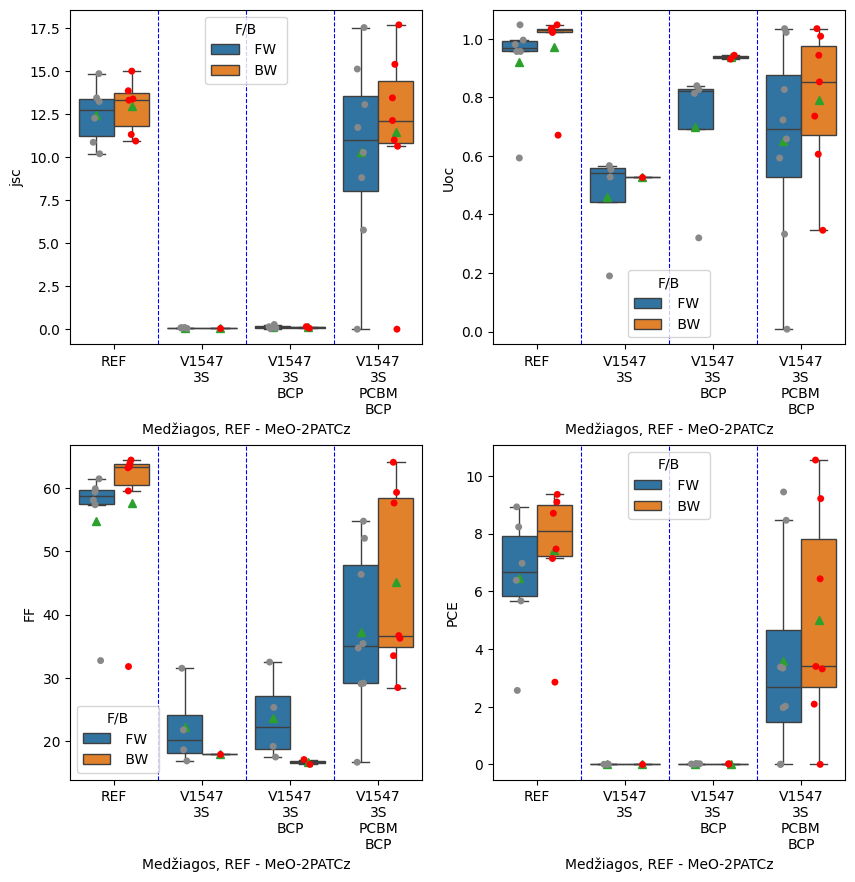

In [1]:
# Kontrolinė užduotis atskiroje kodo celėje.
# Žemiau - tie patys veiksmai atskirose kodo celėse.

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# read text file into pandas DataFrame
df = pd.read_csv("../../../../kopija/2024_10_25_17val44min_III_P_K_A_params.dat",sep=";",header=0,skiprows=[1])

# Tvarkomos antraštės
df.columns=df.columns.str.strip()

# Tvarkomi duomenų formatai
df['name'] = df['SC'].apply(lambda x: str(x).split('_')[2].replace('+',' '))
df['card'] = df['SC'].apply(lambda x: str(x).split('_')[2].replace('+','\n'))
df['jsc'] = df['jsc'].apply(lambda x: abs(float(x)))
df['Uoc'] = df['Uoc'].apply(lambda x: float(x))
df['FF']  = df['FF'].apply(lambda x: float(x))
df['PCE'] = df['PCE'].apply(lambda x: float(x))

# Kopijuojama į atskirus df
REF_df=df[df['SC'].str.contains('REF')] # len=12
V1547_df=df[df['SC'].str.contains('V1547')] # len=26 (tarpinis df tolesnei atrankai)
V1547_3S_df=V1547_df[V1547_df['SC'].str.contains('3S_')] # len=5
V1547_3S_BCP_df=V1547_df[V1547_df['SC'].str.contains('3S\+BCP')] # len=6
V1547_3S_PCBM_BCP_df=V1547_df[V1547_df['SC'].str.contains('PCBM\+BCP')] # len=15

# Braižomi grafikai
sns.color_palette(palette='deep')
fig,axes=plt.subplots(2,2,figsize=(10,10))
fig.subplots_adjust(hspace=0.3)
point_palette=sns.blend_palette(["#888888","#ff0000"],2)
sns.boxplot(data=df,x='card',y='jsc',ax=axes[0,0],showmeans=True,showfliers=False,hue='F/B')
sns.stripplot(data=df,x='card',y='jsc',ax=axes[0,0],hue='F/B',dodge=True,palette=point_palette,legend=False)
sns.boxplot(data=df,x='card',y='Uoc',ax=axes[0,1],showmeans=True,showfliers=False,hue='F/B')
sns.stripplot(data=df,x='card',y='Uoc',ax=axes[0,1],hue='F/B',dodge=True,palette=point_palette,legend=False)
sns.boxplot(data=df,x='card',y='FF',ax=axes[1,0],showmeans=True,showfliers=False,hue='F/B')
sns.stripplot(data=df,x='card',y='FF',ax=axes[1,0],hue='F/B',dodge=True,palette=point_palette,legend=False)
sns.boxplot(data=df,x='card',y='PCE',ax=axes[1,1],showmeans=True,showfliers=False,hue='F/B')
sns.stripplot(data=df,x='card',y='PCE',ax=axes[1,1],hue='F/B',dodge=True,palette=point_palette,legend=False)
cards=set(df['card'])
for ax in axes.flat:
    for x in range(len(cards)-1): 
        ax.axvline(x=x+0.5,color="blue",linestyle="--",linewidth=0.8)
        ax.set_xlabel('Medžiagos, REF - MeO-2PATCz')
plt.show()

In [1]:
# Read Text Files with Pandas using read_csv()

# importing pandas
import pandas as pd

# read text file into pandas DataFrame
df = pd.read_csv("../../../../kopija/2024_10_25_17val44min_III_P_K_A_params.dat",sep=";",header=0,skiprows=[1])

# display DataFrame structure
print(df.columns)

Index(['SC ', ' F/B ', ' Uoc ', ' jsc ', ' FF ', ' Umax ', ' jmax ', ' Pmax ',
       ' PCE', ' S', ' t'],
      dtype='object')


In [3]:
# df

In [4]:
df=df.rename(columns=lambda x: x.strip())
print(df.columns)

Index(['SC', 'F/B', 'Uoc', 'jsc', 'FF', 'Umax', 'jmax', 'Pmax', 'PCE', 'S',
       't'],
      dtype='object')


In [2]:
df.columns=df.columns.str.strip()
print(df.columns)
# "str.strip is ~2X faster, I expect this to scale better for larger dfs."

Index(['SC', 'F/B', 'Uoc', 'jsc', 'FF', 'Umax', 'jmax', 'Pmax', 'PCE', 'S',
       't'],
      dtype='object')


In [3]:
df.head()

,SC,F/B,Uoc,jsc,FF,Umax,jmax,Pmax,PCE,S,t
0,P_III_REF_1k_10-25,FW,1.048,-14.83888,57.3896,0.736,-12.12625,-8.9247,8.9247,0.08,-1.0
1,P_III_REF_1k_10-25,BW,1.048,-14.98405,59.5824,0.827,-11.31375,-9.3564,9.3564,0.08,-1.0
2,P_III_REF_2k_10-25,FW,0.996,-13.43314,61.5012,0.736,-11.18000,-8.2285,8.2285,0.08,-1.0
3,P_III_REF_2k_10-25,BW,1.035,-13.84410,63.4651,0.775,-11.73375,-9.0937,9.0937,0.08,-1.0
4,P_III_REF_3k_10-25,FW,0.957,-12.25571,59.4133,0.723,-9.63875,-6.9684,6.9684,0.08,-1.0


In [4]:
# Tvarkomi duomenų formatai

df['name'] = df['SC'].apply(lambda x: str(x).split('_')[2].replace('+',' '))
df['card'] = df['SC'].apply(lambda x: str(x).split('_')[2].replace('+','\n'))
df['jsc'] = df['jsc'].apply(lambda x: abs(float(x)))
df['Uoc'] = df['Uoc'].apply(lambda x: float(x))
df['FF']  = df['FF'].apply(lambda x: float(x))
df['PCE'] = df['PCE'].apply(lambda x: float(x))

In [5]:
df.head()

,SC,F/B,Uoc,jsc,FF,Umax,jmax,Pmax,PCE,S,t,name,card
0,P_III_REF_1k_10-25,FW,1.048,14.83888,57.3896,0.736,-12.12625,-8.9247,8.9247,0.08,-1.0,REF,REF
1,P_III_REF_1k_10-25,BW,1.048,14.98405,59.5824,0.827,-11.31375,-9.3564,9.3564,0.08,-1.0,REF,REF
2,P_III_REF_2k_10-25,FW,0.996,13.43314,61.5012,0.736,-11.18000,-8.2285,8.2285,0.08,-1.0,REF,REF
3,P_III_REF_2k_10-25,BW,1.035,13.84410,63.4651,0.775,-11.73375,-9.0937,9.0937,0.08,-1.0,REF,REF
4,P_III_REF_3k_10-25,FW,0.957,12.25571,59.4133,0.723,-9.63875,-6.9684,6.9684,0.08,-1.0,REF,REF


In [6]:
import seaborn as sns
# import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd

In [ ]:
# Kopijuojama į atskirus df

print("len(df) =",len(df)) # len=38

REF_df=df[df['SC'].str.contains('REF')] # len=12
V1547_df=df[df['SC'].str.contains('V1547')] # len=26 (tarpinis df tolesnei atrankai)
V1547_3S_df=V1547_df[V1547_df['SC'].str.contains('3S_')] # len=5
V1547_3S_BCP_df=V1547_df[V1547_df['SC'].str.contains('3S\+BCP')] # len=6
V1547_3S_PCBM_BCP_df=V1547_df[V1547_df['SC'].str.contains('PCBM\+BCP')] # len=15

# print(V1547_3S_df.columns)
# V1547_3S_df.info()
# print(df)

len(df) = 38


In [8]:
# clrplt=sns.color_palette(palette='deep')
# print(clrplt)

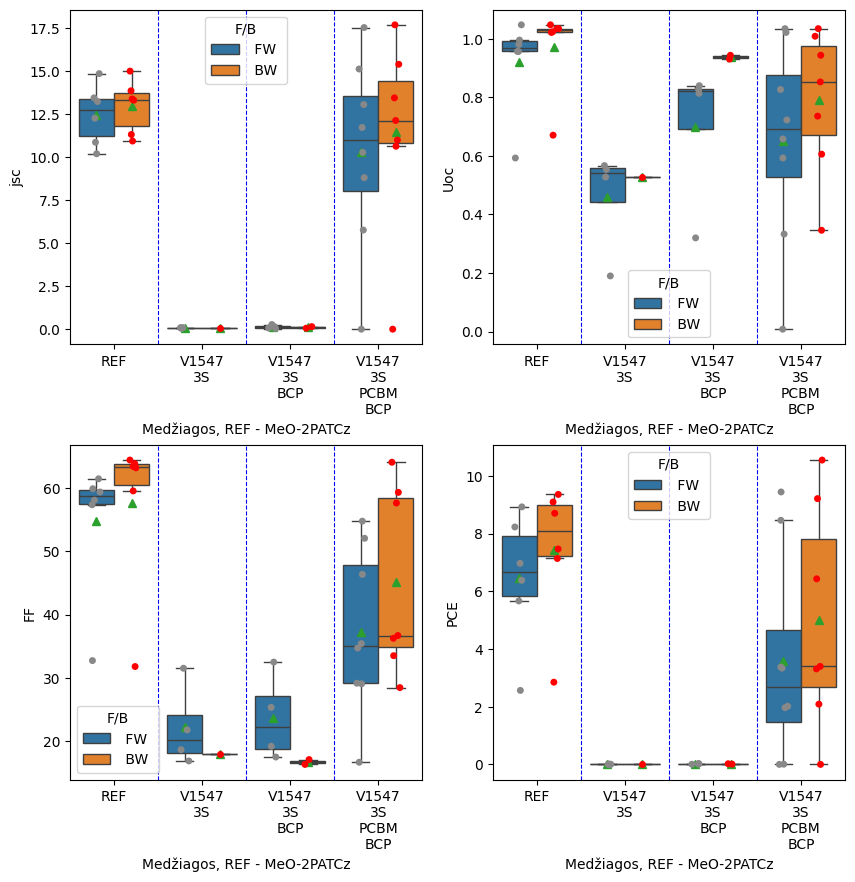

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# read text file into pandas DataFrame
df = pd.read_csv("../../../../kopija/2024_10_25_17val44min_III_P_K_A_params.dat",sep=";",header=0,skiprows=[1])

# Tvarkomos antraštės
df.columns=df.columns.str.strip()

# Tvarkomi duomenų formatai
df['name'] = df['SC'].apply(lambda x: str(x).split('_')[2].replace('+',' '))
df['card'] = df['SC'].apply(lambda x: str(x).split('_')[2].replace('+','\n'))
df['jsc'] = df['jsc'].apply(lambda x: abs(float(x)))
df['Uoc'] = df['Uoc'].apply(lambda x: float(x))
df['FF']  = df['FF'].apply(lambda x: float(x))
df['PCE'] = df['PCE'].apply(lambda x: float(x))

# Kopijuojama į atskirus df
REF_df=df[df['SC'].str.contains('REF')] # len=12
V1547_df=df[df['SC'].str.contains('V1547')] # len=26 (tarpinis df tolesnei atrankai)
V1547_3S_df=V1547_df[V1547_df['SC'].str.contains('3S_')] # len=5
V1547_3S_BCP_df=V1547_df[V1547_df['SC'].str.contains('3S\+BCP')] # len=6
V1547_3S_PCBM_BCP_df=V1547_df[V1547_df['SC'].str.contains('PCBM\+BCP')] # len=15

# Braižomi grafikai
sns.color_palette(palette='deep')
fig,axes=plt.subplots(2,2,figsize=(10,10))
fig.subplots_adjust(hspace=0.3)
point_palette=sns.blend_palette(["#888888","#ff0000"],2)
sns.boxplot(data=df,x='card',y='jsc',ax=axes[0,0],showmeans=True,showfliers=False,hue='F/B')
sns.stripplot(data=df,x='card',y='jsc',ax=axes[0,0],hue='F/B',dodge=True,palette=point_palette,legend=False)
sns.boxplot(data=df,x='card',y='Uoc',ax=axes[0,1],showmeans=True,showfliers=False,hue='F/B')
sns.stripplot(data=df,x='card',y='Uoc',ax=axes[0,1],hue='F/B',dodge=True,palette=point_palette,legend=False)
sns.boxplot(data=df,x='card',y='FF',ax=axes[1,0],showmeans=True,showfliers=False,hue='F/B')
sns.stripplot(data=df,x='card',y='FF',ax=axes[1,0],hue='F/B',dodge=True,palette=point_palette,legend=False)
sns.boxplot(data=df,x='card',y='PCE',ax=axes[1,1],showmeans=True,showfliers=False,hue='F/B')
sns.stripplot(data=df,x='card',y='PCE',ax=axes[1,1],hue='F/B',dodge=True,palette=point_palette,legend=False)
cards=set(df['card'])
for ax in axes.flat:
    for x in range(len(cards)-1): 
        ax.axvline(x=x+0.5,color="blue",linestyle="--",linewidth=0.8)
        ax.set_xlabel('Medžiagos, REF - MeO-2PATCz')
plt.show()